In [1]:
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt

import pymysql

In [2]:
#한글화
fm = mp.font_manager.FontManager()
plt.rcParams['font.family'] = 'Malgun Gothic'

In [3]:
# db 접속정보 설정
DB_HOST=''
DB_PORT = ''
DB_USER = ''
DB_PASS = ''
DB_NAME=''

In [4]:
# db 접속
conn = pymysql.connect(host = DB_HOST, port = DB_PORT, user = DB_USER, passwd = DB_PASS, db = DB_NAME, cursorclass=pymysql.cursors.DictCursor)
cur = conn.cursor()

sql = """
SELECT * FROM response_kay
"""
cur.execute(sql)

result = cur.fetchall()
df = pd.DataFrame(result)

# db 연결 종료
conn.commit()    
conn.close()

In [5]:
df.columns

Index(['ID', 'Q9A', 'Q10'], dtype='object')

In [7]:
#데이터정보확인
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28575 entries, 0 to 28574
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ID      28575 non-null  int64
 1   Q9A     28575 non-null  int64
 2   Q10     28575 non-null  int64
dtypes: int64(3)
memory usage: 669.9 KB
None


In [9]:
df.head()

,ID,Q9A,Q10
0,1,1,1
1,2,1,1
2,3,1,1
3,4,1,1
4,5,1,1


In [13]:
#상담센터 인지여부(1:있다, 2:없다)
Coaching_df_Q9A = df['Q9A']

In [14]:
Coaching_df_Q9A.value_counts()

2    20560
1     8015
Name: Q9A, dtype: int64

In [16]:
Coaching_df_Q9A = df['Q9A']

In [17]:
Coaching_df_Q9A = pd.DataFrame(Coaching_df_Q9A)

In [18]:
Coaching_df_Q9A['CNT'] = 1

In [19]:
Coaching_df_Q9A = Coaching_df_Q9A.groupby('Q9A').sum()
Coaching_df_Q9A

,CNT
Q9A,
1,8015
2,20560


In [20]:
tot = Coaching_df_Q9A['CNT'].sum()

In [21]:
Coaching_df_Q9A['RATE'] = ['{0}'.format(cnt / tot * 100) for cnt in Coaching_df_Q9A['CNT']]

In [22]:
Coaching_df_Q9A

,CNT,RATE
Q9A,,
1,8015,28.048993875765525
2,20560,71.95100612423447


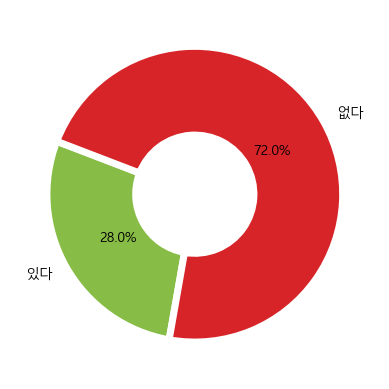

In [23]:
#시각화
ratio = Coaching_df_Q9A['RATE'].tolist()
labels = ['있다', '없다']
colors = ['#87BC46','#D72428']
wedgeprops={'width': 0.6, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, colors=colors, wedgeprops=wedgeprops)

plt.savefig('./상담센터인지여부.png',transparent = True)
plt.show()

----

In [24]:
Coaching_df_Q10 = df['Q10']

In [25]:
#교육경험 여부(1:있다, 2:없다)
Coaching_df_Q10.value_counts()

2    22972
1     5603
Name: Q10, dtype: int64

In [27]:
Coaching_df_Q10 = df['Q10']
Coaching_df_Q10 = pd.DataFrame(Coaching_df_Q10)
Coaching_df_Q10['CNT'] = 1
Coaching_df_Q10 = Coaching_df_Q10.groupby('Q10').sum()
tot = Coaching_df_Q10['CNT'].sum()
Coaching_df_Q10['RATE'] = ['{0}'.format(cnt / tot * 100) 
                           for cnt in Coaching_df_Q10['CNT']]
Coaching_df_Q10

,CNT,RATE
Q10,,
1,5603,19.608048993875766
2,22972,80.39195100612423


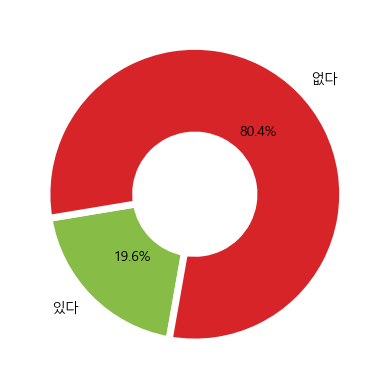

In [28]:
#시각화
ratio = Coaching_df_Q10['RATE'].tolist()
labels = ['있다', '없다']
colors = ['#87BC46','#D72428']
wedgeprops={'width': 0.6, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, 
        counterclock=False, colors=colors, wedgeprops=wedgeprops)

plt.savefig('./교육경험여부.png',transparent = True)
plt.show()